In [19]:
"""
Numerically solving the fokker planck equation
by Shane Gervais

Attempting a different approach torwards solving the
2D stencil

last updated: 2022/04/13
"""

'\nNumerically solving the fokker planck equation\n#by Shane Gervais\n#For the curriculum of MATH4503 with\n#Dr. Sanjeev Seahra\n#SID: 3620569\n#last updated: 2022/03/26\n'

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Initial parameters
N = 100 #Number of grid lines (used as the same later)
L = 2 #Max length
kB = 1.380649E-23 #Boltzman constant
B = 1 #mobility
T = 300 #Kelvin
D = kB*B*T #Diffusion constant
l = 1 #Restoring force

#Initial condition
x0 = 0
y0 = 0
t0 = 0
#Time step and grid steps
h = 2
s = 2

In [22]:
"""
Fokker Planck 1D FTCS stencil accepts a 
function f
position vector x
Time step dt
Grid step dx

Solves the Fokker Planck equation numerical from the FTCS method
and returns numerical solution f
"""

def fokkerPlanck1D(x,f,dt,dx):
    
    #Parameters
    tMax= int(1e4)
    C1 = B*l
    C2 = D

    #Using the FTCS method
    for t in range(0,tMax-1):

        for i in range(0,len(f[0])): 
            
            #Boundary conditions
            if i==0:
                f_d= (f[t,i+1]-f[t,i])/dx
                f_dd= (f[t,i+1]-2*f[t,i])/dx**2
            
            elif i==len(f[0])-1:
                f_d= (f[t,i]-f[t,i-1])/dx
                f_dd= (-2*f[t,i]+f[t,i-1])/dx**2
            else:
                f_d= (f[t,i+1]-f[t,i-1])*0.5/dx
                f_dd= (f[t,i+1]-2*f[t,i]+f[t,i-1])/dx**2
                
            #Right hand side of our FPE equation
            rhs= C1*( x[i]* f_d + f[t,i])+ C2*f_dd

            f[t+1,i]= f[t,i] + dt*rhs

    return f

In [23]:
tMax= int(1e4)
x= np.linspace(-1,1,500)
f= np.zeros((tMax,len(x)))

In [24]:
#Test functions
f0 = np.exp(-10*x**2)
f[0] = f0

In [25]:
#Solve the FPE
f= fokkerPlanck1D(x,f,dt=1e-3,dx=2)

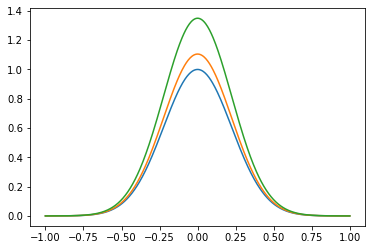

In [26]:
plt.plot(x,f[0,:])
plt.plot(x,f[100,:])
plt.plot(x,f[300,:])


In [27]:
"""
Fokker Planck 1D FTCS stencil accepts a 
function f
position vector r = r(x,y)
Time step dt
Grid step dx

Solves the Fokker Planck equation numerical from the FTCS method
and returns numerical solution f
"""

def fokkerPlanck2D(r, f, dt, dx, dy):
    
    #Parameters
    tMax= int(1e4)

    #Using the FTCS method
    for t in range(0,tMax-1):

        for i in range(0,len(f[0])): 
            
            for j in range(0, len(f[0])):
                #Boundary conditions
                if i==0:
                    f_dx = (f[t,i+1,j]-f[t,i,j])/dx
                    r_dx = (r[i+1,j] - r[i,j])/dx
                    f_ddx = (f[t,i+1,j]-2*f[t,i,j])/dx**2
            
                elif i==len(f[0])-1:
                    f_dx = (f[t,i,j]-f[t,i-1,j])/dx
                    r_dx = (r[i,j] - r[i-1,j])/dx
                    f_ddx = (-2*f[t,i,j]+f[t,i-1,j])/dx**2
                else:
                    f_dx = (f[t,i+1,j]-f[t,i-1,j])*0.5/dx
                    r_dx = (r[i+1,j] - r[i-1,j])*0.5/dx
                    f_ddx = (f[t,i+1,j]-2*f[t,i,j]+f[t,i-1,j])/dx**2
                
                if j==0:
                    f_dy = (f[t,i,j+1]-f[t,i,j])/dy
                    r_dy = (r[i,j+1] - r[i,j])/dy
                    f_ddy = (f[t,i,j+1]-2*f[t,i,j])/dy**2
            
                elif j==len(f[0])-1:
                    f_dy = (f[t,i,j]-f[t,i,j-1])/dy
                    r_dy = (r[i,j] - r[i,j-1])/dy
                    f_ddy = (-2*f[t,i,j]+f[t,i,j-1])/dy**2
                else:
                    f_dy = (f[t,i,j+1]-f[t,i,j-1])*0.5/dy
                    r_dy = (r[i,j+1] - r[i,j-1])*0.5/dy
                    f_ddy = (f[t,i,j+1]-2*f[t,i,j]+f[t,i,j-1])/dy**2

                

                #Right hand side of our FPE equation
                rhs= B*l*( r[i,0]*f_dx + f[t,i,j]*r_dx +r[0,j]*f_dy +f[t,i,j]*r_dy) + D*(f_ddx + f_ddy)

                f[t+1,i,j]= f[t,i,j] + dt*rhs

    return f

In [28]:
tMax= int(1e4)
x= np.linspace(-1,1,N)
y= np.linspace(-1,1,N)

r = np.zeros((N,N))

for i in range(N-1):
    for j in range(N-1):
        r[i,j] = np.sqrt((x[i])**2 + (y[j])**2)
        
f= np.zeros((tMax,len(x),len(y)))

In [34]:
#Test functions
f0 = 100*np.exp(0.01*(x**2 +y**2))
f[0,0] = f0

In [35]:
#Solve the FPE
f= fokkerPlanck2D(r,f,dt=1e-3,dx=2,dy=2)

Text(0, 0.5, 'Y')

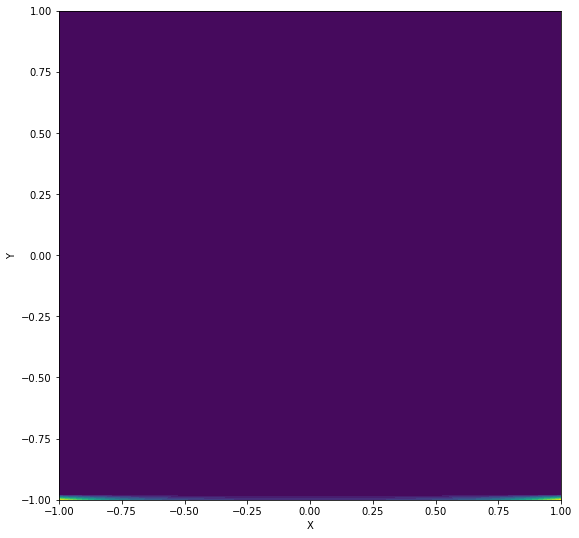

In [36]:
X, Y = np.meshgrid(x, y)
plt.figure(figsize=(9,9))
plt.contourf(X,Y, f[0, :, :], 20)
plt.xlabel("X")
plt.ylabel("Y")

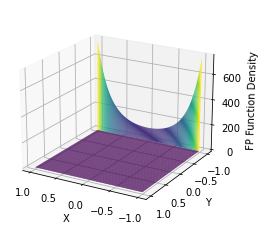

In [40]:
#Plotting results in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, f[0,:,:], rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("FP Function Density")

ax.view_init(20,120)